# Image Classification with CNN using Keras

#  Import Libraries

In [1]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')

print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


TensorFlow version: 2.15.0
Is using GPU? True


#  Preprocess Data

In [2]:
def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)

    indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)

    x = x[indices]
    y = y[indices]

    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)

    x = x[indices]
    y = y[indices]

    y = tf.keras.utils.to_categorical(y)

    return x, y

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


170498071/170498071 [==============================] - 13s 0us/step


In [4]:
x_train, y_train = get_three_classes(x_train, y_train)
x_test, y_test = get_three_classes(x_test, y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


#  Visualize Examples

In [5]:
class_names = ['aeroplane', 'car', 'bird']

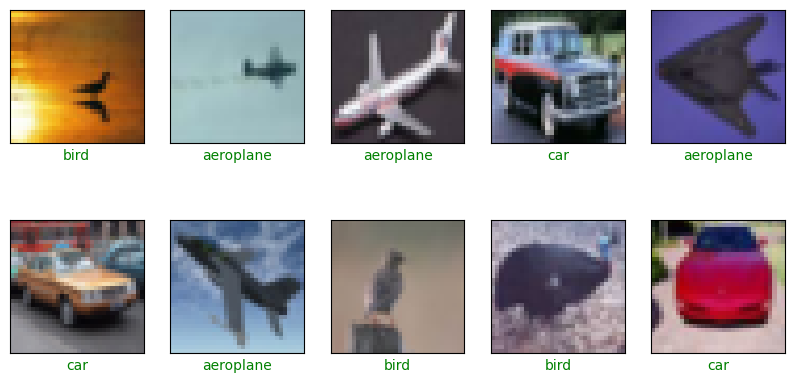

In [6]:
def show_random_examples(x, y, p):
  indices = np.random.choice(range(x.shape[0]), 10, replace = False)

  x = x[indices]
  p = p[indices]
  y = y[indices]

  plt.figure(figsize = (10, 5))
  for i in range(10):
    plt.subplot(2, 5, 1 + i)
    plt.imshow(x[i])
    plt.xticks([])
    plt.yticks([])
    col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
    plt.xlabel(class_names[np.argmax(p[i])], color = col)
  plt.show()
show_random_examples(x_train, y_train, y_train)

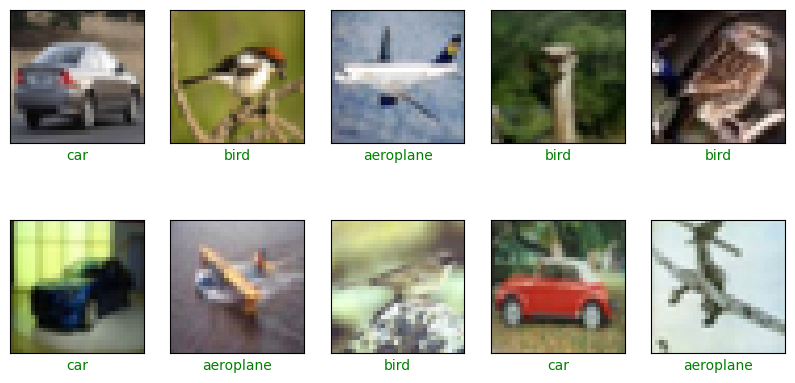

In [7]:
show_random_examples(x_test, y_test, y_test)

# Create Model

In [9]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

def create_model():
  def add_conv_block(model, filters):
    model.add(Conv2D(filters, 3, activation = 'relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters, 3, activation = 'relu'))
    model.add(MaxPooling2D(pool_size = 2))
    model.add(Dropout(0.5))
    return model

  model = tf.keras.Sequential()
  model.add(Input(shape = (32,32,3)))
  model = add_conv_block(model, 32)
  model = add_conv_block(model, 64)
  model = add_conv_block(model, 128)
  model.add(Flatten())
  model.add(Dense(3, activation = 'softmax'))

  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

  return model

model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)       

#  Train the Model

In [13]:
h = model.fit(x_train/255., y_train,
          validation_data = (x_test/255., y_test),
          epochs = 10, batch_size = 128,
          callbacks = [
              tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 3),
              tf.keras.callbacks.ModelCheckpoint(
                  'models/model_{val_accuracy:.3f}.h5',
                  save_best_only = True, save_weights_only = False,
                  monitor = 'val_accuracy'
              )
          ])

Epoch 1/10
118/118 [==============================] - 3s 23ms/step - loss: 0.2658 - accuracy: 0.8991 - val_loss: 0.4375 - val_accuracy: 0.8457
Epoch 2/10
  8/118 [=>............................] - ETA: 1s - loss: 0.2722 - accuracy: 0.8926

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


118/118 [==============================] - 2s 18ms/step - loss: 0.2555 - accuracy: 0.9016 - val_loss: 0.3374 - val_accuracy: 0.8653
Epoch 3/10
118/118 [==============================] - 2s 17ms/step - loss: 0.2380 - accuracy: 0.9117 - val_loss: 0.3460 - val_accuracy: 0.8720
Epoch 4/10
118/118 [==============================] - 2s 18ms/step - loss: 0.2326 - accuracy: 0.9114 - val_loss: 0.4132 - val_accuracy: 0.8447
Epoch 5/10
118/118 [==============================] - 2s 18ms/step - loss: 0.2287 - accuracy: 0.9117 - val_loss: 0.2331 - val_accuracy: 0.9140
Epoch 6/10
118/118 [==============================] - 2s 16ms/step - loss: 0.2173 - accuracy: 0.9188 - val_loss: 0.3069 - val_accuracy: 0.8787
Epoch 7/10
118/118 [==============================] - 2s 18ms/step - loss: 0.2094 - accuracy: 0.9213 - val_loss: 0.2614 - val_accuracy: 0.9030
Epoch 8/10
118/118 [==============================] - 2s 18ms/step - loss: 0.2010 - accuracy: 0.9242 - val_loss: 0.2841 - val_accuracy: 0.8930


# Final Predictions

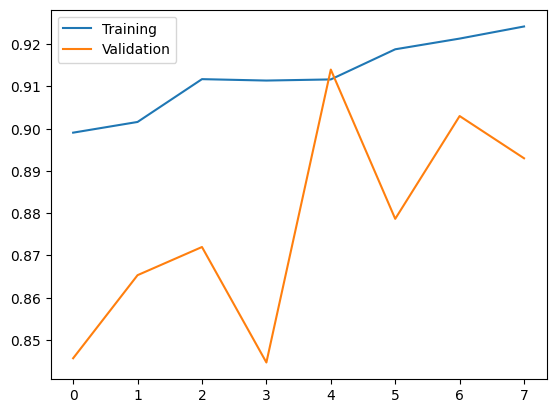

In [14]:
accs = h.history['accuracy']
val_accs = h.history['val_accuracy']

plt.plot(range(len(accs)), accs, label = 'Training')
plt.plot(range(len(val_accs)), val_accs, label = 'Validation')
plt.legend()
plt.show()


In [15]:
model = tf.keras.models.load_model('/content/models/model_0.914.h5')

In [16]:
preds = model.predict(x_test / 255.)

94/94 [==============================] - 1s 4ms/step


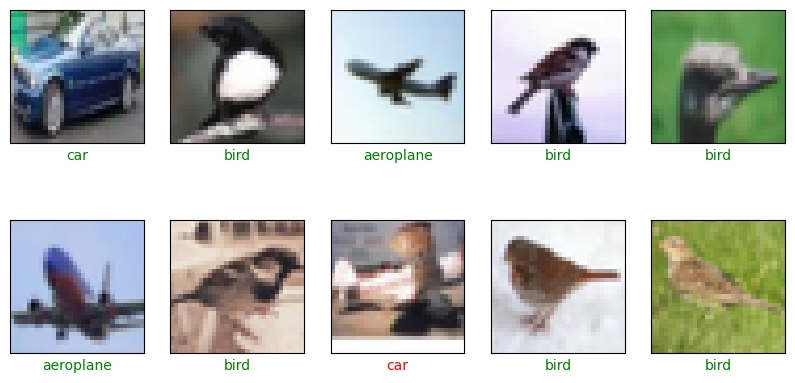

In [17]:
show_random_examples(x_test, y_test, preds)